In [14]:

import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

## Collecting Data

In [15]:
# df = pdr.get_data_tiingo('MRO', api_key=key)
# df.to_csv('MRO.csv')

In [16]:
df = pd.read_csv('MRO.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MRO,2017-05-31 00:00:00+00:00,13.02,13.10,12.75,12.92,14540830,12.211546,12.286579,11.958311,12.117756,14540830,0.0,1.0
1,MRO,2017-06-01 00:00:00+00:00,13.10,13.41,12.95,13.05,11547207,12.286579,12.577330,12.145893,12.239683,11547207,0.0,1.0
2,MRO,2017-06-02 00:00:00+00:00,12.72,12.99,12.56,12.96,13797001,11.930174,12.183409,11.780109,12.155272,13797001,0.0,1.0
3,MRO,2017-06-05 00:00:00+00:00,12.78,12.86,12.54,12.61,10988204,11.986449,12.061481,11.761351,11.827004,10988204,0.0,1.0
4,MRO,2017-06-06 00:00:00+00:00,12.88,12.96,12.64,12.76,10639213,12.080239,12.155272,11.855142,11.967690,10639213,0.0,1.0


In [17]:
df1 = df.reset_index()['close']
df1.shape

(1259,)

In [18]:
df1.head()

0    13.02
1    13.10
2    12.72
3    12.78
4    12.88
Name: close, dtype: float64

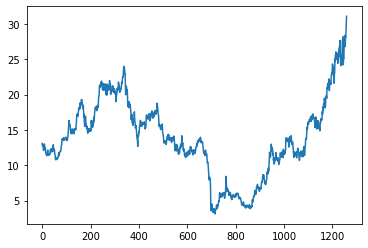

In [19]:
plt.plot(df1)

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.35420394],
       [0.35706619],
       [0.34347048],
       ...,
       [0.92629696],
       [0.95277281],
       [1.        ]])

## Splitting Data for Training and Testing

In [21]:
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_data, test_data = df1[0:train_size,:], df1[train_size:len(df1),:1]
len(train_data), len(test_data)

(818, 441)

## Preprocessing

In [22]:
def create_data_matrix(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
time_step = 100
X_train, y_train = create_data_matrix(train_data, time_step)
X_test, y_valid = create_data_matrix(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_train.shape)

(717, 100)
(717,)
(340, 100)
(717,)


(None, None)

In [25]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Implementing Stacked LSTM Model